In [19]:
from sklearn.datasets import load_wine, make_classification,make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


---- Classification Task ----


/home/mr-arthor/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:36:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


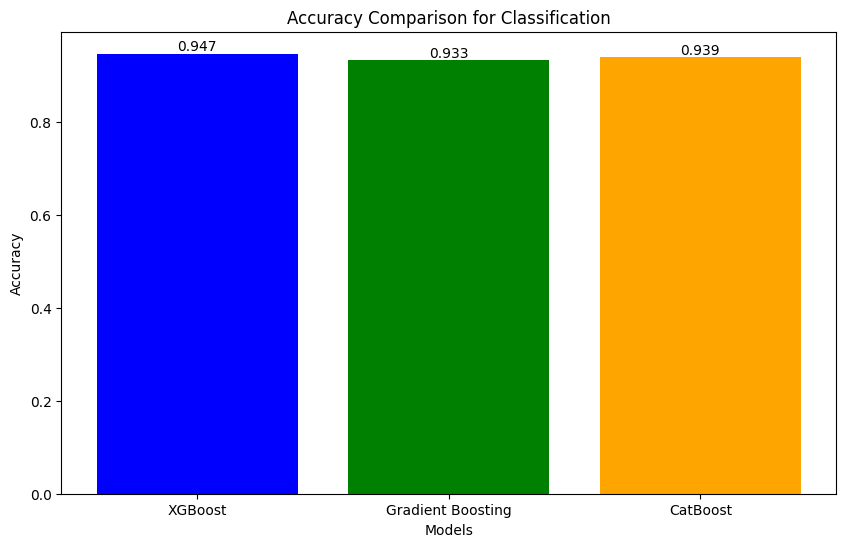

In [20]:
# Function to plot comparison
def plot_comparison(models, metrics, task, metric_name):
    plt.figure(figsize=(10, 6))
    plt.bar(models, metrics, color=["blue", "green", "orange"])
    plt.xlabel("Models")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} Comparison for {task}")
    for i, val in enumerate(metrics):
        plt.text(i, val, f"{val:.3f}", ha='center', va='bottom')
    plt.show()

# ---- Classification ----
print("---- Classification Task ----")

# Load Wine dataset

X, y = make_classification(
    n_samples=10000,    # Number of samples
    n_features=20,     # Number of features
    n_informative=20,  # Number of informative features
    n_redundant=0,     # Number of redundant features
    random_state=42
)
learni = 1


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost Classifier
xgb_clf = XGBClassifier(learning_rate=learni, max_depth=3, n_estimators=100, use_label_encoder=False, random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(learning_rate=learni, max_depth=3, n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

# CatBoost Classifier
cb_clf = CatBoostClassifier(iterations=100, learning_rate=learni, depth=3, loss_function='MultiClass', random_seed=42, verbose=0)
cb_clf.fit(X_train, y_train)
cb_pred = cb_clf.predict(X_test)
cb_accuracy = accuracy_score(y_test, cb_pred)

# Classification Comparison Plot
plot_comparison(["XGBoost", "Gradient Boosting", "CatBoost"], [xgb_accuracy, gb_accuracy, cb_accuracy], "Classification", "Accuracy")



---- Regression Task ----


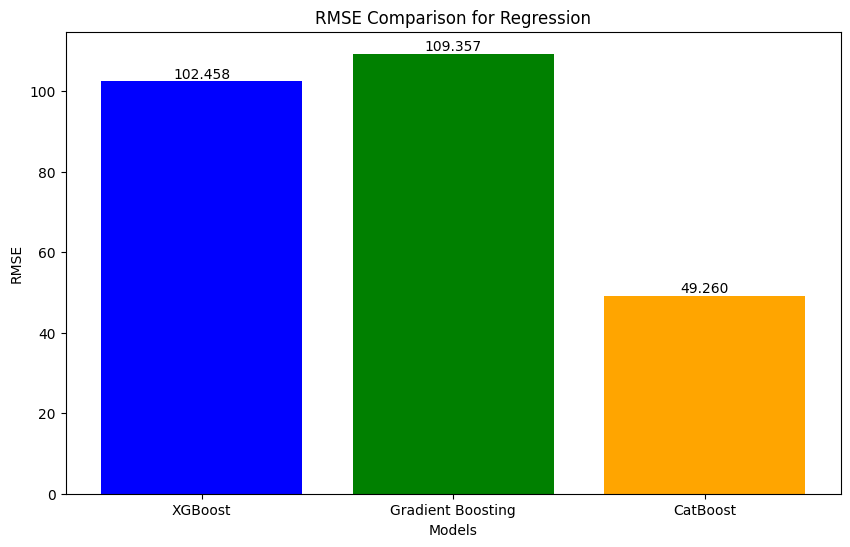


---- Summary ----
Classification Accuracy:
XGBoost: 0.95, Gradient Boosting: 0.93, CatBoost: 0.94

Regression RMSE:
XGBoost: 102.46, Gradient Boosting: 109.36, CatBoost: 49.26
Regression R2:
XGBoost: 0.8793, Gradient Boosting: 0.8625, CatBoost: 0.9721


In [21]:

# ---- Regression ----
print("\n---- Regression Task ----")

# Load California Housing dataset
X, y = make_regression(
    n_samples=10000,    # Number of samples
    n_features=20,     # Number of features
    n_informative=20,  # Number of informative features
   
       # Number of redundant features
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost Regressor
xgb_reg = XGBRegressor(learning_rate=learni, max_depth=3, n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(learning_rate=learni, max_depth=3, n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_r2 = r2_score(y_test, gb_pred)
# CatBoost Regressor
cb_reg = CatBoostRegressor(iterations=100, learning_rate=learni, depth=3, loss_function='RMSE', random_seed=42, verbose=0)
cb_reg.fit(X_train, y_train)
cb_pred = cb_reg.predict(X_test)
cb_rmse = np.sqrt(mean_squared_error(y_test, cb_pred))
cb_r2 = r2_score(y_test, cb_pred)

# Regression Comparison Plot
plot_comparison(["XGBoost", "Gradient Boosting", "CatBoost"], [xgb_rmse, gb_rmse, cb_rmse], "Regression", "RMSE")

# ---- Summary ----
print("\n---- Summary ----")

# Classification Results
print("Classification Accuracy:")
print(f"XGBoost: {xgb_accuracy:.2f}, Gradient Boosting: {gb_accuracy:.2f}, CatBoost: {cb_accuracy:.2f}")

# Regression Results
print("\nRegression RMSE:")
print(f"XGBoost: {xgb_rmse:.2f}, Gradient Boosting: {gb_rmse:.2f}, CatBoost: {cb_rmse:.2f}")
print("Regression R2:")
print(f"XGBoost: {xgb_r2:.4f}, Gradient Boosting: {gb_r2:.4f}, CatBoost: {cb_r2:.4f}")
